# **Computer Vision and Robot Perceptron**: HW1 - Image Classification using CNNs
In this assignment, you will practice training a CNN from scratch on Tiny-ImageNet, which is a smaller version of ImageNet with 200 classes. Each class contains 500 images in the training set and 50 images in the testing set. The goals of this assignment are as follows:

- Understand the data-driven Image Classification pipeline (train/predict stages).
- Understand the train/val/test splits and the use of validation data for hyperparameter tuning.
- Learn how to finetune the pretrained model on the downstream task.

## Part 1: Training a CNN from scratch on Tiny ImageNet
In this part, you will train a CNN model from scratch, and evaluate your model on the given test set.
To finish this part, you will have to:
1. The data is split into train/val/test, the validation data is randomly selected from the training set, and the testing set is fixed. It is recommeded to do data augmentations, such as slight rotation. Please visit this website for more details: https://pytorch.org/vision/main/transforms.html
2. Create a customized CNN model at your own, any techniques, such as dropout, normalizations, are all welcomed!
3. Plot the training accuracy curve, report the testing accuracy and plot the confusion matrix.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torch import Tensor
from typing import Type
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import pdb

import kagglehub

### Step 1: Download the Tiny ImageNet dataset from Kaggle
Please DO NOT modify this cell.

In [2]:
# Download tiny imagenet
base_dir = kagglehub.dataset_download("huchanwei123/cvrp-tinyimagenet")
print("Path to dataset files:", base_dir)
train_dir = os.path.join(base_dir, 'tiny-imagenet/train')
test_dir = os.path.join(base_dir, 'tiny-imagenet/test')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Path to dataset files: /home/saijaideepreddymure/.cache/kagglehub/datasets/huchanwei123/cvrp-tinyimagenet/versions/1


### Step 2: Create the data loader, and split it to train/val
1. The original folder structure is: \
   ├── train \
│   ├── labels (such as n01443537) \
│   │   ├── images \
│   │   │   ├── n01443537_0.JPEG \
│   │   │   ├── n01443537_1.JPEG \
│   │   │   ├── ... \
   It is highly recommended to use ```dataset.ImageFolder``` to load the data!
2. To check how to transform your data, check here: https://pytorch.org/vision/main/transforms.html
3. Later when you train the model, you might need to tune hyperparameters. For example, you may not want the fixed learning rate.


In [3]:
# Parameters
img_size = 64

# Hyper-parameters for the training (NOTE: you can tune it!)
learning_rate = 0.001
batch_size = 32
num_epochs = 80
num_classes = 200

######################################### Data Loaders ##########################################
# For example, you might want to resize the image first so your model can take any input size.
train_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.RandomRotation(15),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
])
test_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
])
#################################################################################################
#                                         Your code here                                        #
#################################################################################################

### Define the split ratio (e.g., 80% train, 20% validation)
# Your code
train_data = ImageFolder(root = train_dir,transform=train_transforms)
test_data = ImageFolder(root = test_dir,transform=test_transforms)


### Split the dataset, ex: using random_split
# Your code
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])

### Create data loaders with Pytorch DataLoader
# Your code
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


### Step 3: Create your own CNN!
More details can be found here: https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch

In [4]:
import torch
import torch.nn as nn

class yourCNN(nn.Module):
    def __init__(self, num_classes=200):
        super(yourCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc_layers = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global pooling
            nn.Flatten(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Example usage
# model = OptimizedCNN(num_classes=200)
# print(model)


### Step 4: We are now ready to train the CNN model!
1. Define your model with your CNN class!
2. Define the loss function (```CrossEntropyLoss()```?) and the optimizer. More details can be found here: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

In [5]:
### Define the model
#model = yourCNN(num_classes = num_classes).to(device)


### Define the Loss function and optimizer
# criterion = ?
# optimizer = ?
model = yourCNN(num_classes = num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Step 5: Implement your training procedure!
#### For training:
1. Iterate through each batch in the train dataloader
2. Reset the optimizer
3. Calculate the loss
4. Do backpropagation!
5. Keep track of the loss and accuracy when finishing this epoch

#### For evaluating:
Similar to the training process, but DON'T train the model! Only prediction!

**NOTE**: It is to modify the in/out arguments of ```train_model``` function

In [6]:
### Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        #############################################################
        #                      Your code here                       #
        #############################################################
        train_loss = 0.0
        train_accuracy = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_accuracy += (predicted == labels).sum().item() / len(labels) # Calculate accuracy for the batch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy/len(train_loader):.4f}")

        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy / len(train_loader)) # Store average batch accuracy



        ### Validation
        model.eval()
        #############################################################
        #                      Your code here                       #
        #############################################################
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_accuracy += (predicted == labels).sum().item() / len(labels) # Calculate accuracy for the batch

        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy / len(val_loader)) # Store average batch accuracy
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy/len(val_loader):.4f}")


    return train_losses, val_losses, train_accuracies, val_accuracies, model

### Step 6: Start training the model!
Actually nothing to do in this cell...

Epoch 1/80, Loss: 4.9772, Accuracy: 0.0226
Epoch 1/80, Validation Loss: 4.6545, Validation Accuracy: 0.0443
Epoch 2/80, Loss: 4.5588, Accuracy: 0.0523
Epoch 2/80, Validation Loss: 4.2955, Validation Accuracy: 0.0827
Epoch 3/80, Loss: 4.2580, Accuracy: 0.0835
Epoch 3/80, Validation Loss: 4.2452, Validation Accuracy: 0.0950
Epoch 4/80, Loss: 4.0157, Accuracy: 0.1137
Epoch 4/80, Validation Loss: 3.8541, Validation Accuracy: 0.1394
Epoch 5/80, Loss: 3.8209, Accuracy: 0.1432
Epoch 5/80, Validation Loss: 3.5669, Validation Accuracy: 0.1843
Epoch 6/80, Loss: 3.6670, Accuracy: 0.1688
Epoch 6/80, Validation Loss: 3.4815, Validation Accuracy: 0.2062
Epoch 7/80, Loss: 3.5476, Accuracy: 0.1880
Epoch 7/80, Validation Loss: 3.3489, Validation Accuracy: 0.2283
Epoch 8/80, Loss: 3.4237, Accuracy: 0.2109
Epoch 8/80, Validation Loss: 3.2193, Validation Accuracy: 0.2511
Epoch 9/80, Loss: 3.3223, Accuracy: 0.2292
Epoch 9/80, Validation Loss: 3.1117, Validation Accuracy: 0.2679
Epoch 10/80, Loss: 3.2225, A

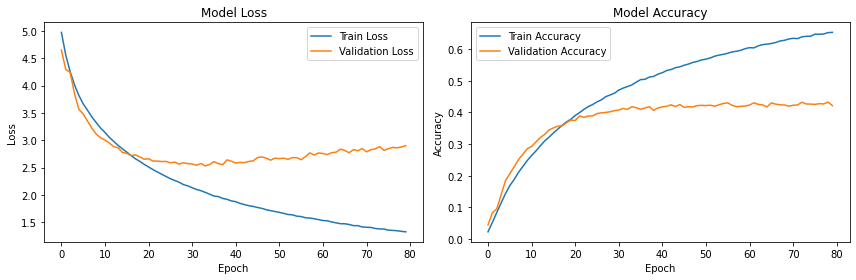

In [7]:
### Train the model
train_losses, val_losses, train_accuracies, val_accuracies, model = train_model(model, train_loader, val_loader, criterion, optimizer)

### We will save the model, in part 2 we gonna use it!
torch.save(model.state_dict(), 'CNN_weights_full_dataset.pth')

### Plot results. This is a naive plot, you are encouraged to improve it!
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Step 7: Evaluate your model on testing set and plot the confusion matrix
In this part, you will learn to evaluate a trained model on testing set, and plot the confusion matrix.
Ideally, a great classification model would have non-zero values only along the diagonal, with zeros in all off-diagonal elements.

**HINTS**
1. Remember to perform the same transforms to your testing set as the validation set.
2. In ```get_predictions```, it is basically the same as you do evaluation.

In [9]:
############################### Test Data Loader ##############################
###############################################################################
#                                 Your code here                              #
###############################################################################

### If you don't want to train the model again, you can restore it!
model.load_state_dict(torch.load('CNN_weights_full_dataset.pth'))

# Change model to evaluation phase
model.eval()

# Function to get predictions and true labels
def get_predictions(model, dataloader):
    #############################################################
    #                      Your code here                       #
    #############################################################
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_predictions), np.array(all_labels)


### Get predictions and true labels
print(f"Test dataset size: {len(test_loader.dataset)}")

predictions, true_labels = get_predictions(model, test_loader)
print("Predictions:", predictions)
print("True labels:", true_labels)
################# Compute confusion matrix ##################
#############################################################
# cm = ?
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)
#############################################################

### Calculate accuracy
accuracy = (predictions == true_labels).mean()
print(f"Test Accuracy: {accuracy:.4f}")

Test dataset size: 10000
Predictions: [ 0  0  0 ... 12 39 15]
True labels: [  0   0   0 ... 199 199 199]
Confusion Matrix:
[[38  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  1]
 [ 0  0 28 ...  0  0  1]
 ...
 [ 0  0  0 ... 17 13  0]
 [ 0  0  0 ...  4 34  0]
 [ 0  0  0 ...  0  1 15]]
Test Accuracy: 0.4410


### Questions
1. Did you observe overfitting? If yes, how did you address it?
2. The original dataset is well-balanced, that is, each class has the same number of training examples. However, this rarely happens in the real situation because some classes may dominate the training set. For example, in autonomous driving application, most training data are vehicles moving forward, while moving backwards take a small amount. This is called longtailed dataset. You will have to train the same CNN model on tiny-imagenet dataset with longtailed distribution.
   
   ```base_dir = kagglehub.dataset_download("huchanwei123/cvrp-tinyimagenet-lt")``` \
   ```train_dir = os.path.join(base_dir, 'tiny-imagenet-lt/train')``` \
   ```test_dir = os.path.join(base_dir, 'tiny-imagenet-lt/test')```

   Please plot out the trainig data distribuion (x-axis: class ID, y-axis: number of images), and analyze the performance compared to original dataset.
3. With your results trained on longtailed tiny-imagenet, you might observe the lower testing accuracy. Please try to improve the algorithm by performing a more **aggresive data augmentation** or **frequent re-sampling on tail classes**. (Note: Just try your best!)

In [10]:
# Download tiny imagenet
base_dir_lt = kagglehub.dataset_download("huchanwei123/cvrp-tinyimagenet-lt")
print("Path to dataset files:", base_dir_lt)
train_dir_lt = os.path.join(base_dir_lt, 'tiny-imagenet-lt/train')
test_dir_lt = os.path.join(base_dir_lt, 'tiny-imagenet-lt/test')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Path to dataset files: /home/saijaideepreddymure/.cache/kagglehub/datasets/huchanwei123/cvrp-tinyimagenet-lt/versions/1


In [11]:
# Parameters
img_size = 64

# Hyper-parameters for the training (NOTE: you can tune it!)
learning_rate = 0.001
batch_size = 32
num_epochs = 80
num_classes = 200

######################################### Data Loaders ##########################################
# For example, you might want to resize the image first so your model can take any input size.
train_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),               
    transforms.RandomRotation(15),                          
    transforms.RandomHorizontalFlip(),                      
    transforms.RandomVerticalFlip(),                        
    transforms.ColorJitter(brightness=0.2, contrast=0.2,    
                           saturation=0.2, hue=0.1),
    transforms.RandomCrop(img_size, padding=4),              
    transforms.RandomPerspective(distortion_scale=0.5,        
                                 p=0.5, interpolation=3),
    transforms.ToTensor(),  
])
test_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
])
#################################################################################################
#                                         Your code here                                        #
#################################################################################################

### Define the split ratio (e.g., 80% train, 20% validation)
# Your code
train_data_lt = ImageFolder(root = train_dir_lt,transform=train_transforms)
test_data_lt = ImageFolder(root = test_dir_lt,transform=test_transforms)


### Split the dataset, ex: using random_split
# Your code
train_size = int(0.8 * len(train_data_lt))
val_size = len(train_data_lt) - train_size
train_data_lt, val_data_lt = random_split(train_data_lt, [train_size, val_size])

### Create data loaders with Pytorch DataLoader
# Your code
train_loader_lt = DataLoader(train_data_lt, batch_size=batch_size, shuffle=True)
val_loader_lt = DataLoader(val_data_lt, batch_size=batch_size, shuffle=False)
test_loader_lt = DataLoader(test_data_lt, batch_size=batch_size, shuffle=False)


In [12]:
model_lt = yourCNN(num_classes = num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lt.parameters(), lr=learning_rate)

Epoch 1/80, Loss: 5.0692, Accuracy: 0.0180
Epoch 1/80, Validation Loss: 4.9712, Validation Accuracy: 0.0232
Epoch 2/80, Loss: 4.9616, Accuracy: 0.0222
Epoch 2/80, Validation Loss: 4.8924, Validation Accuracy: 0.0262
Epoch 3/80, Loss: 4.8814, Accuracy: 0.0281
Epoch 3/80, Validation Loss: 4.8810, Validation Accuracy: 0.0330
Epoch 4/80, Loss: 4.7675, Accuracy: 0.0352
Epoch 4/80, Validation Loss: 4.7625, Validation Accuracy: 0.0373
Epoch 5/80, Loss: 4.6492, Accuracy: 0.0495
Epoch 5/80, Validation Loss: 4.5652, Validation Accuracy: 0.0615
Epoch 6/80, Loss: 4.5023, Accuracy: 0.0631
Epoch 6/80, Validation Loss: 4.3786, Validation Accuracy: 0.0785
Epoch 7/80, Loss: 4.4163, Accuracy: 0.0725
Epoch 7/80, Validation Loss: 4.3055, Validation Accuracy: 0.0924
Epoch 8/80, Loss: 4.3357, Accuracy: 0.0830
Epoch 8/80, Validation Loss: 4.2894, Validation Accuracy: 0.0886
Epoch 9/80, Loss: 4.2693, Accuracy: 0.0897
Epoch 9/80, Validation Loss: 4.2633, Validation Accuracy: 0.0932
Epoch 10/80, Loss: 4.2112, A

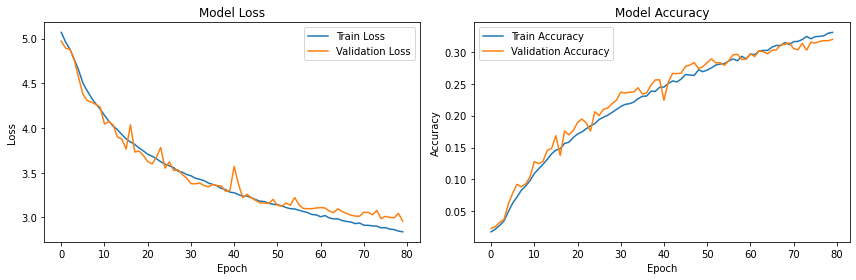

In [13]:
### Train the model
train_losses, val_losses, train_accuracies, val_accuracies, model = train_model(model_lt, train_loader_lt, val_loader_lt, criterion, optimizer)

### We will save the model, in part 2 we gonna use it!
torch.save(model.state_dict(), 'CNN_weights_full_dataset_lt.pth')

### Plot results. This is a naive plot, you are encouraged to improve it!
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
 
model.load_state_dict(torch.load('CNN_weights_full_dataset_lt.pth'))

# Change model to evaluation phase
model.eval()

# # Function to get predictions and true labels
# def get_predictions(model, dataloader):
#     #############################################################
#     #                      Your code here                       #
#     #############################################################
#     all_predictions = []
#     all_labels = []
#     with torch.no_grad():
#         for images, labels in dataloader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             all_predictions.extend(predicted.cpu().numpy())
#             all_labels.extend(labels.cpu().numpy())
#     return np.array(all_predictions), np.array(all_labels)


 
print(f"Test dataset size: {len(test_loader_lt.dataset)}")

predictions, true_labels = get_predictions(model, test_loader_lt)
print("Predictions:", predictions)
print("True labels:", true_labels)
################# Compute confusion matrix ##################
#############################################################
# cm = ?
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)
#############################################################

### Calculate accuracy
accuracy = (predictions == true_labels).mean()
print(f"Test Accuracy: {accuracy:.4f}")

Test dataset size: 10000


Predictions: [ 58 188   0 ... 196  43 199]
True labels: [  0   0   0 ... 199 199 199]
Confusion Matrix:
[[20  0  0 ...  0  0  2]
 [ 0 26  4 ...  0  0  0]
 [ 0  0 17 ...  0  0  2]
 ...
 [ 0  0  0 ...  1 12  0]
 [ 0  0  0 ...  1 25  0]
 [ 0  0  1 ...  0  0 12]]
Test Accuracy: 0.2784


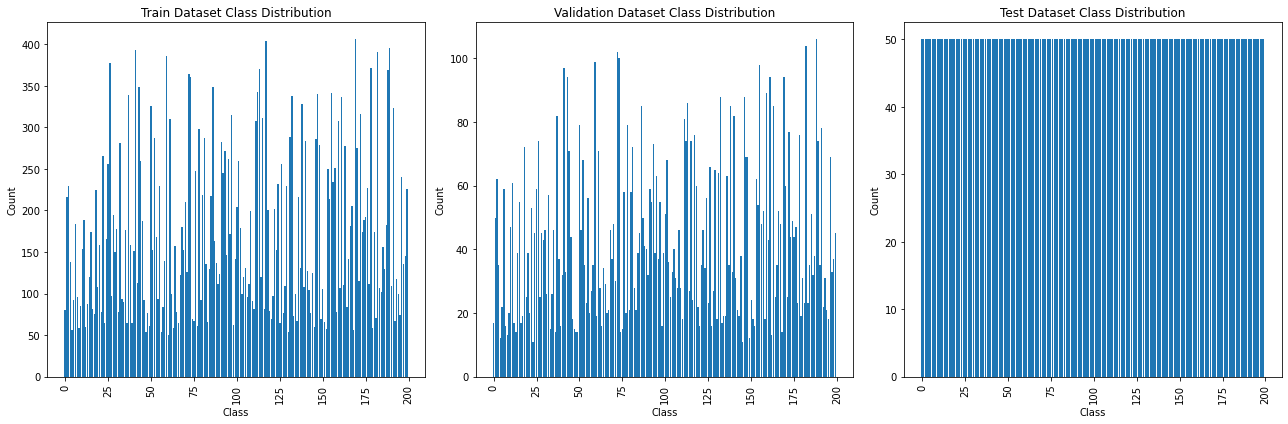

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from torch.utils.data import DataLoader 
def get_class_distribution(data_loader):
    labels = []
    for _, target in data_loader:
        labels.extend(target.cpu().numpy())  
    return Counter(labels) 
train_class_distribution = get_class_distribution(train_loader_lt)
val_class_distribution = get_class_distribution(val_loader_lt)
test_class_distribution = get_class_distribution(test_loader_lt)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(train_class_distribution.keys(), train_class_distribution.values())
axes[0].set_title('Train Dataset Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90) 
axes[1].bar(val_class_distribution.keys(), val_class_distribution.values())
axes[1].set_title('Validation Dataset Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90) 
axes[2].bar(test_class_distribution.keys(), test_class_distribution.values())
axes[2].set_title('Test Dataset Class Distribution')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.show()
